In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.get_backend()

iris = pd.read_csv('../assets/iris.csv')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


(array([ 4.,  7., 22., 24., 37., 31., 10., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

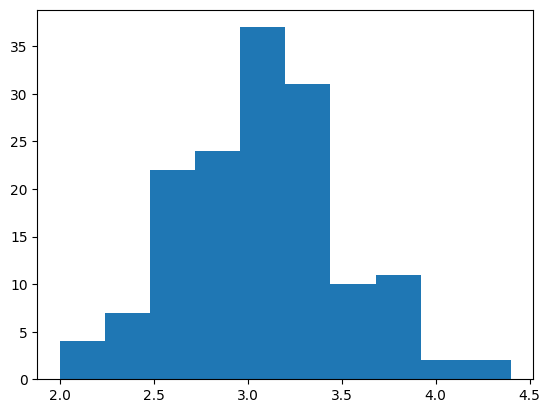

In [2]:
# We'll use the plt.hist method in matplotlib to create the same very basic histograms of sepal width.
plt.hist(iris['sepal_width'])


(array([ 1.,  0.,  3.,  4.,  3.,  8.,  5.,  9., 14., 10., 26., 11., 13.,
         6., 12.,  6.,  4.,  3.,  6.,  2.,  1.,  1.,  1.,  0.,  1.]),
 array([2.   , 2.096, 2.192, 2.288, 2.384, 2.48 , 2.576, 2.672, 2.768,
        2.864, 2.96 , 3.056, 3.152, 3.248, 3.344, 3.44 , 3.536, 3.632,
        3.728, 3.824, 3.92 , 4.016, 4.112, 4.208, 4.304, 4.4  ]),
 <BarContainer object of 25 artists>)

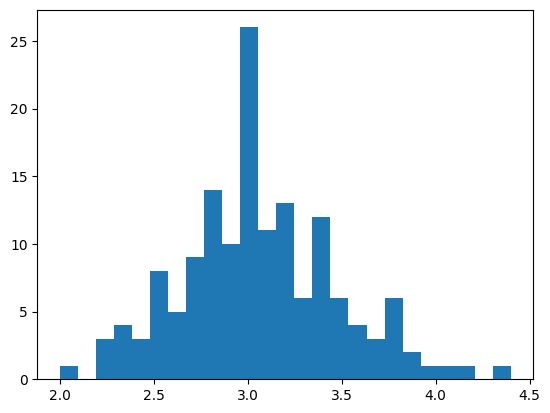

In [3]:
# Notice that by default, the histograms in matplotlib use ten bins, that is ten different bars.

# Lets do it again but use bins=25

plt.hist(iris['sepal_width'], bins=25)


Text(0, 0.5, 'Frequency ')

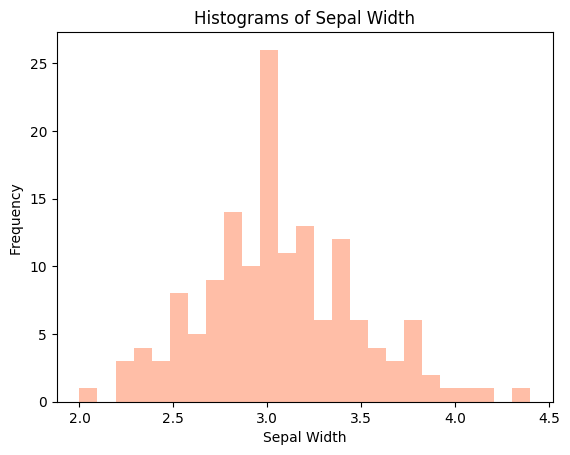

In [5]:
# This looks a lot smootther and more uniform than the first one.
# The hist() function has many options to tune both the calculation and the display.
# The plt.hist docstring has more information on other customization options that are available.

# Let's explore those and create a more customized histogram, that gives more information about the axis.

plt.hist(iris['sepal_width'], bins=25, alpha=0.5, histtype='stepfilled', color='coral')

# We can also add a title and label axis
plt.title('Histograms of Sepal Width')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency ')


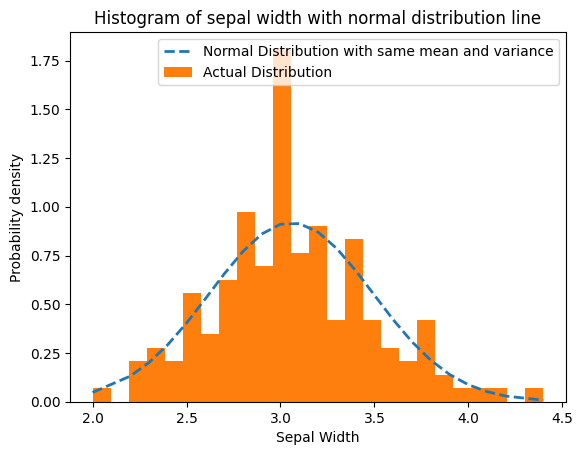

In [11]:
# The plot most often accompanied by a histogram is a normal distribution plot. These plots come in handy
# when we are trying to identify averages, outliers, and distributions. Also, they're very easy to produce with python.

# First, we'll be focusing on the normal distribution using the probability density function.
# Basically, if we havr a range of x's which in this case would be the sepal width variable measures,
# a mean and a standard deviation, we can pass them onto this formula and get corresponding y values. 

# Which we can then plot using the standard plot function.

from scipy.stats import norm

#  convert pandas DataFrame objects to numpy array and sort
sw = np.asarray(iris['sepal_width'])
sw = sorted(sw)

# Let's use the scipy stats module pdf, or probabilitydensity function to fit a normal distribution
# With same mean and standard deviation, and inside it we can use numpy to determine a mean and STF of sepal width

fit = norm.pdf(sw, np.mean(sw), np.std(sw))

# Now, we can plot both series on the histogram
plt.plot(sw, fit, '--', linewidth = 2, label='Normal Distribution with same mean and variance')
plt.hist(sw, density=True, bins=25, label='Actual Distribution')

# And add our info
plt.title('Histogram of sepal width with normal distribution line')
plt.xlabel('Sepal Width')
plt.ylabel('Probability density')
plt.legend()
plt.show()


In [12]:
# The data doesnt look very noirmal, as we can see there are several points extending above the normal distribution line.

# Lets check out the kurtosis. Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to 
# a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers.
# Data sets with low kurtosis tend to have light tails, or lack of outliers. 
# A uniform distribution would be the extreme case. 

# We can use the pandas .kurt to do this
iris['sepal_width'].kurt()


0.2282490424681929

In [ ]:
# We can see that the data are indeed not normal because the Kurtosis doesnt equal to 1
# The sign of the kurtosis indicates how the data deviate from the normal distribution.
# In our case, we have a positive value of .228 indicates that the distribution has heavier tails 
# and a sharper peak than the normal distribution.

# If it was a negative value, then it is a lighter tail and a flatter distribution.




(array([20., 23., 16., 16.,  5.,  9.,  3.,  1.,  6.,  1.]),
 array([3.86329710e-03, 3.71035950e+01, 7.42033267e+01, 1.11303058e+02,
        1.48402790e+02, 1.85502522e+02, 2.22602253e+02, 2.59701985e+02,
        2.96801717e+02, 3.33901449e+02, 3.71001180e+02]),
 <BarContainer object of 10 artists>)

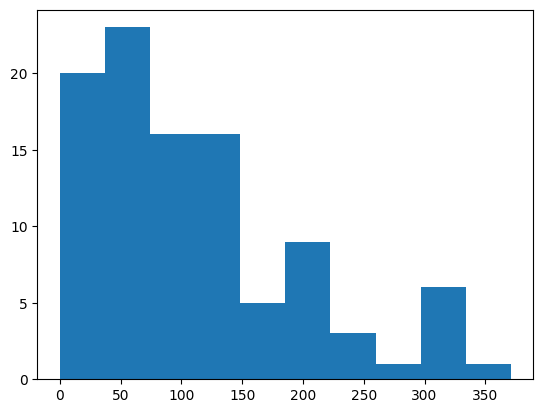

In [14]:
# To make this more concrete, below is an example of a sample of Gaussian numbers transformed to have an exponential distribution

np.random.seed(42) # Ensure we get the same data every time
X = (np.random.randn(100,1) * 5 + 10)**2
plt.hist(X)

In [ ]:
# The data seems very noisy and is strangely skewed. With experience, you would notice the data
# are positively skewed because the tail on the right side of the distribution is longer and fatter.

In [15]:
# lets check out the Kurtosis
from scipy.stats import kurtosis

kurtosis(X, fisher=True)


array([0.34387516])

In [16]:
# For normall distributed data, the skeweness should be around 0. Skeweness > 0 means 
# that there is more weight in the right tail of the distribution.

from scipy.stats import skew
skew(X)



array([0.96378623])

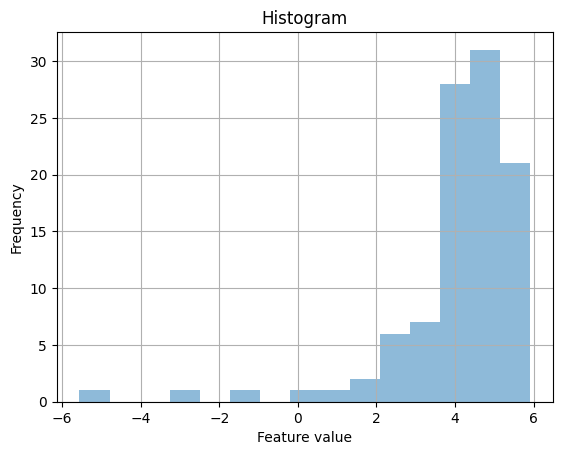

In [18]:
# We can transform the data, by trying to invert the mathematical operation that has occured up to the point where 
# we measured it. 

df = pd.DataFrame(X)

df_exp= df.apply(np.log)
df_exp.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

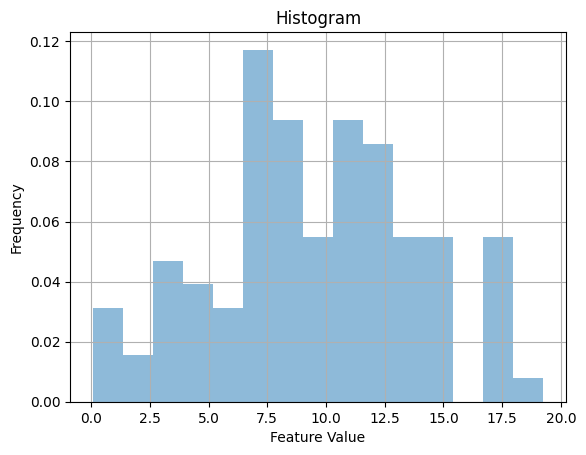

In [24]:
# Try a power law

df_pow = df.apply(np.sqrt)
df_pow.plot.hist(density = True, alpha=0.5, bins=15, grid=True, legend=None)
plt.xlabel('Feature Value')
plt.title('Histogram')
plt.show()

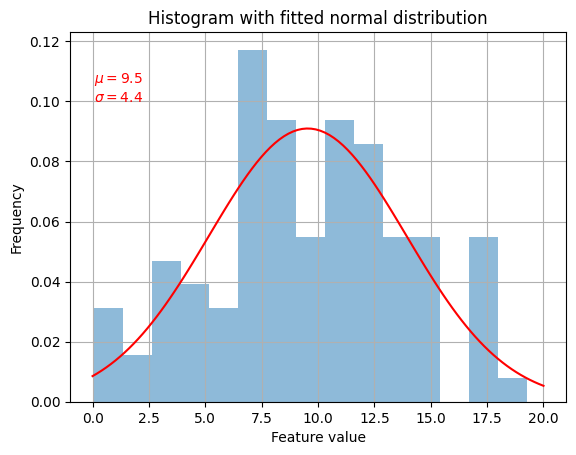

In [26]:
# Looks better!

# But to be sure lets fit a normal curve over the top

import scipy.stats as stats
from scipy.stats import norm
param= stats.norm.fit(df_pow)

x = np.linspace(0,20,100)
pdf_fitted = stats.norm.pdf(x, *param)

df_pow.plot.hist(density = True, alpha=0.5, bins=15, grid=True, legend=None )
plt.text(x=np.min(df_pow), y=0.1, s=r"$\mu=%0.1f$" % param[0] + "\n" + r"$\sigma=%0.1f$" % param[1], color='r')

plt.plot(x, pdf_fitted, color='r')

plt.xlabel('Feature value')
plt.title("Histogram with fitted normal distribution")
plt.show()